In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

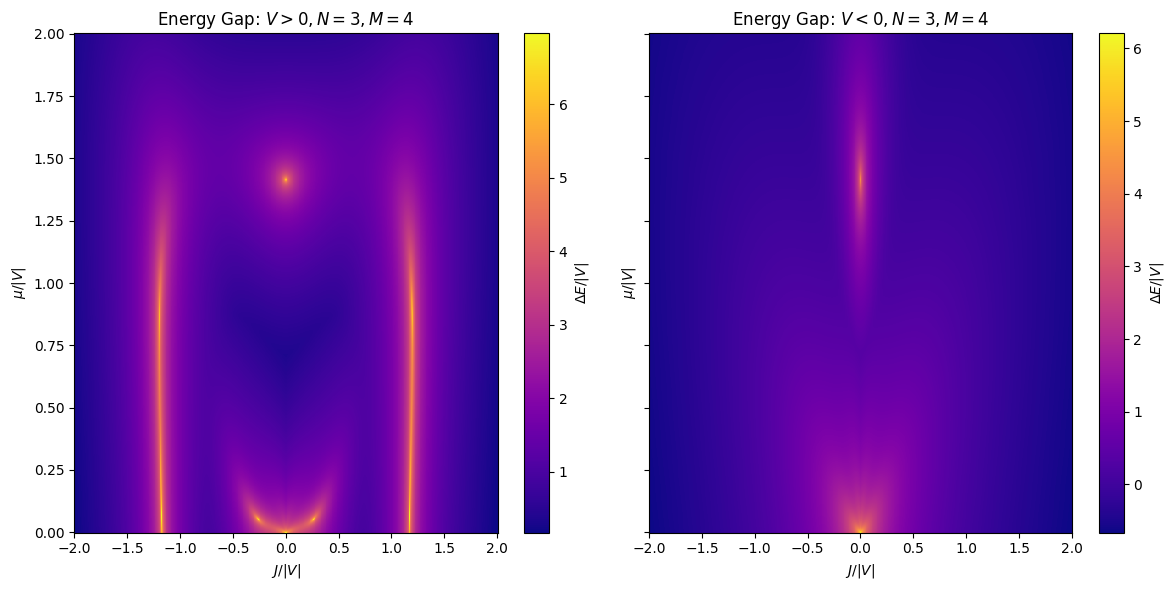

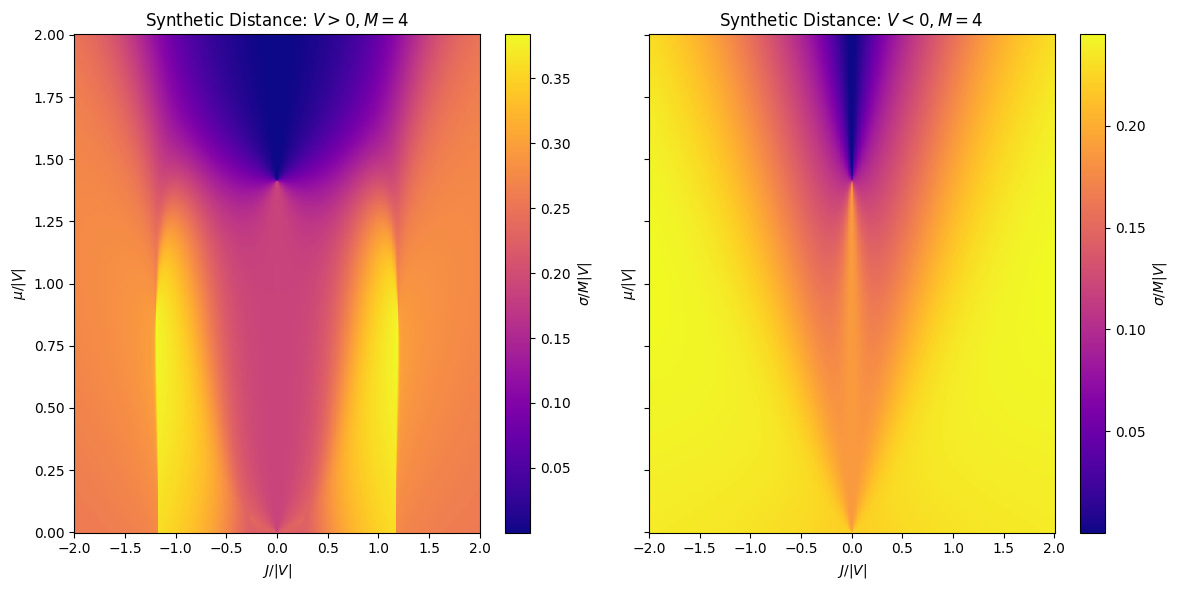

In [4]:
N = 3
M = 4
min_V_J_ratio = -2
max_V_J_ratio = 2
max_mu_V_ratio = 2
resolution = 500

mu_V_ratios = np.linspace(0, max_mu_V_ratio, resolution)
J_V_ratios = np.linspace(min_V_J_ratio, max_V_J_ratio, resolution)
mu_V_ratio_grid, J_V_ratio_grid = np.meshgrid(mu_V_ratios, J_V_ratios)

fig1, (ax1_pos, ax1_neg) = plt.subplots(ncols=2, sharey=True, figsize=(12, 6))
fig2, (ax2_pos, ax2_neg) = plt.subplots(ncols=2, sharey=True, figsize=(12, 6))

for V, ax1, ax2 in zip([-1, 1], [ax1_neg, ax1_pos], [ax2_neg, ax2_pos]):
    sigma_grid = np.zeros_like(mu_V_ratio_grid)
    energy_gap_over_V_grid = np.zeros_like(mu_V_ratio_grid)
    states, _ = enumerate_states(N, M)

    for i, mu_V_ratio in enumerate(mu_V_ratios):
        for j, J_V_ratio in enumerate(J_V_ratios):
            H = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio, J_V_ratio)
            eigenvalues, eigenvectors = exact_diagonalize(H)
            energy_gap = eigenvalues[1] - eigenvalues[0]
            energy_gap_over_V_grid[j, i] = energy_gap
            sigma_grid[j, i] = sigma_ij(0, 1, eigenvectors[0], states, N, M) / M

    pcm1 = ax1.pcolormesh(J_V_ratio_grid, mu_V_ratio_grid, np.log(1/energy_gap_over_V_grid), shading='auto', cmap='plasma')
    ax1.set_title(f"Energy Gap: $V {'>' if V > 0 else '<'} 0, N = {N}, M = {M}$")
    ax1.set_xlabel("$J/|V|$")
    ax1.set_ylabel("$\mu/|V|$")
    fig1.colorbar(pcm1, ax=ax1, label="$\Delta E / |V|$")

    pcm2 = ax2.pcolormesh(J_V_ratio_grid, mu_V_ratio_grid, sigma_grid, shading='auto', cmap='plasma')
    ax2.set_title(f"Synthetic Distance: $V {'>' if V > 0 else '<'} 0, M = {M}$")
    ax2.set_xlabel("$J/|V|$")
    ax2.set_ylabel("$\mu/|V|$")
    fig2.colorbar(pcm2, ax=ax2, label="$\sigma / M|V|$")

# Adjust layouts
fig1.tight_layout()
fig2.tight_layout()

# Show plots
plt.show()


In [21]:
from mpl_toolkits.mplot3d import Axes3D

# Parameters
N = 3
V = 1
min_V_J_ratio = -2
max_V_J_ratio = 2
max_mu_V_ratio = 2
resolution = 100
epsilon = 0.1
M_values = [2, 3]

mu_V_ratios = np.linspace(0, max_mu_V_ratio, resolution)
J_V_ratios = np.linspace(min_V_J_ratio, max_V_J_ratio, resolution)
mu_V_ratio_grid, J_V_ratio_grid = np.meshgrid(mu_V_ratios, J_V_ratios)

J_V_points = []
mu_V_points = []
M_points = []

for M in M_values:
    energy_gap_over_V_grid = np.zeros_like(mu_V_ratio_grid)

    for i, mu_V_ratio in enumerate(mu_V_ratios):
        for j, J_V_ratio in enumerate(J_V_ratios):
            H = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio, J_V_ratio)
            eigenvalues, _ = exact_diagonalize(H)
            energy_gap = eigenvalues[1] - eigenvalues[0]
            energy_gap_over_V_grid[j, i] = energy_gap

            # Check if the energy gap is within epsilon
            if abs(energy_gap) < epsilon:
                J_V_points.append(J_V_ratio)
                mu_V_points.append(mu_V_ratio)
                M_points.append(M)

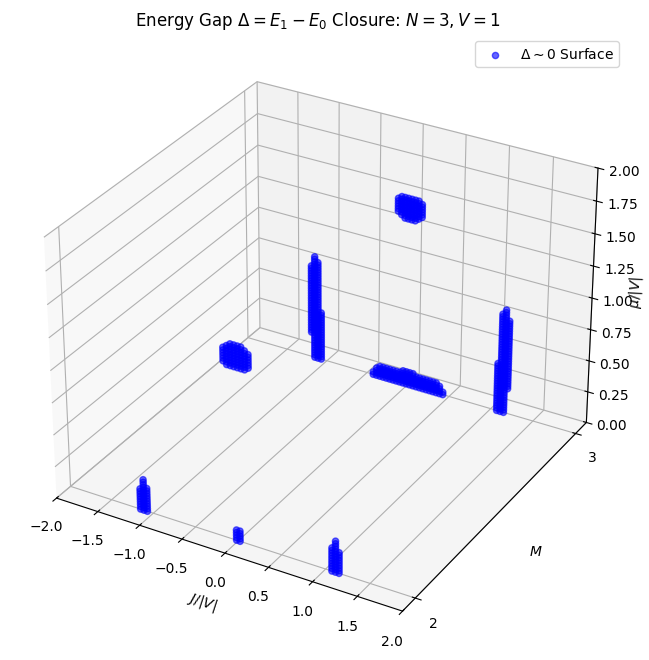

In [22]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(J_V_points, M_points, mu_V_points, c='b', marker='o', alpha=0.6, label="$\Delta \sim 0$ Surface")
ax.set_xlabel("$J/|V|$")
ax.set_ylabel("$M$")
ax.set_zlabel("$\mu/|V|$")
ax.set_xlim(-2,2)
ax.set_zlim(0,2)
ax.zaxis.labelpad=-1.5
ax.set_title(f"Energy Gap $\Delta = E_1 - E_0$ Closure: $N = {N}, V = {V}$")
ax.legend()
ax.set_yticks(M_values)
plt.show()